In [1]:
import sys
sys.path.append("../../..")

import helper as hlp
import pandas as pd
import numpy as np

[nltk_data] Downloading package stopwords to C:\Users\Abdul
[nltk_data]     Manaf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
EPOCHS = 50
MAX_LEN = 30
N_CLASSES = 5
BATCH_SIZE = 64
LEARNING_RATE = 2e-5
NAME = 'xlm(roberta)-combined'
MODEL_NAME = 'xlm-roberta-base'
dir = '../../../../Dataset Statistics/dataset'
path = f'../saved_models/{NAME}'
class_names = ['Disability', 'Gender/Sexual', 'Origin/Nationality', 'Race/Ethnicity', 'Religion']

In [3]:
train_df = pd.read_csv(f'{dir}/train.csv')
val_df = pd.read_csv(f'{dir}/val.csv')
test_df = pd.read_csv(f'{dir}/test.csv')

train_df = train_df[train_df['class'] != 0]
val_df = val_df[val_df['class'] != 0]
test_df = test_df[test_df['class'] != 0]

english_train_texts = train_df['english_text'].values
english_val_texts = val_df['english_text'].values
english_test_texts = test_df['english_text'].values

english_train_labels = train_df[class_names].values
english_val_labels = val_df[class_names].values
english_test_labels = test_df[class_names].values

urdu_train_texts = train_df['urdu_text'].values
urdu_val_texts = val_df['urdu_text'].values
urdu_test_texts = test_df['urdu_text'].values

urdu_train_labels = train_df[class_names].values
urdu_val_labels = val_df[class_names].values
urdu_test_labels = test_df[class_names].values

sindhi_train_texts = train_df['sindhi_text'].values
sindhi_val_texts = val_df['sindhi_text'].values
sindhi_test_texts = test_df['sindhi_text'].values

sindhi_train_labels = train_df[class_names].values
sindhi_val_labels = val_df[class_names].values
sindhi_test_labels = test_df[class_names].values

english_train_texts = [hlp.preprocess_text(text, language="english") for text in english_train_texts]
english_val_texts = [hlp.preprocess_text(text, language="english") for text in english_val_texts]
english_test_texts = [hlp.preprocess_text(text, language="english") for text in english_test_texts]

urdu_train_texts = [hlp.preprocess_text(text, language="urdu") for text in urdu_train_texts]
urdu_val_texts = [hlp.preprocess_text(text, language="urdu") for text in urdu_val_texts]
urdu_test_texts = [hlp.preprocess_text(text, language="urdu") for text in urdu_test_texts]

sindhi_train_texts = [hlp.preprocess_text(text, language="sindhi") for text in sindhi_train_texts]
sindhi_val_texts = [hlp.preprocess_text(text, language="sindhi") for text in sindhi_val_texts]
sindhi_test_texts = [hlp.preprocess_text(text, language="sindhi") for text in sindhi_test_texts]

train_texts = np.concatenate([english_train_texts, urdu_train_texts, sindhi_train_texts])
val_texts = np.concatenate([english_val_texts, urdu_val_texts, sindhi_val_texts])
test_texts = np.concatenate([english_test_texts, urdu_test_texts, sindhi_test_texts])

train_labels = np.concatenate([english_train_labels, urdu_train_labels, sindhi_train_labels])
val_labels = np.concatenate([english_val_labels, urdu_val_labels, sindhi_val_labels])
test_labels = np.concatenate([english_test_labels, urdu_test_labels, sindhi_test_labels])

In [4]:
#shuffle data
train_texts, train_labels = hlp.shuffle_data(train_texts, train_labels)
val_texts, val_labels = hlp.shuffle_data(val_texts, val_labels)
test_texts, test_labels = hlp.shuffle_data(test_texts, test_labels)

In [5]:
#show 5 values along with their labels
for i in range(5):
    print(train_texts[i], train_labels[i])

کسی عورت رہنے والا بھی غیر معمولی بات اگر آپ اپنے کاروبار کو صرف یاد رکھیں [0 1 0 0 0]
ڪاش نگا هجان ها ته ڪڪڙ حامله ٿئي ها، پوءِ ان کي ٻئي سان گڏ وڃي [0 0 0 1 0]
nupur said true even practically happen islamic countries difference abduct non muslim girl read nikah front fake moulvithis allowed zoobear fact check kar liyo [0 0 0 0 1]
snowylovessnow مون ان بابت ڪنهن سان ڳالهايو، ساڳيو سوچيو پوءِ هن ڪچي غور ڪندي ڪجهه ماڻهن کي جواب کان نه روڪيندو ته مهرباني ڪري اسٽفو يا بله بله وغيره [0 1 0 0 0]
سرکاری حکام جو غیر ملکی غیر ملکی غیر سرکاری شہر بنائے ان جرم ذمہ داری ذمہ داری عائد جانی چاہئے [0 1 0 0 0]


In [ ]:
## mbert model and tokenizer
import torch
from transformers import XLMRobertaTokenizer, XLMRobertaForSequenceClassification

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = XLMRobertaTokenizer.from_pretrained(MODEL_NAME)
model = XLMRobertaForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=5 )
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [7]:
train_data_loader = hlp.create_data_loader(train_texts, train_labels, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = hlp.create_data_loader(val_texts, val_labels, tokenizer, MAX_LEN, BATCH_SIZE)

history = hlp.train_model_multi(train_data_loader, val_data_loader, model, optimizer, device, EPOCHS, tokenizer, path)

Epoch 0/50
----------


Training Progress: 100%|██████████| 1442/1442 [05:11<00:00,  4.63it/s, loss=0.141] 


Train loss 0.1555443528636608 accuracy 0.7499783268313828
Validation loss 0.11922498902387282 accuracy 0.8154866393602497
Model and tokenizer saved at epoch 0
Checkpoint saved: Improved validation accuracy at epoch 0: 0.8154866393602497
Epoch 1/50
----------


Training Progress: 100%|██████████| 1442/1442 [05:12<00:00,  4.62it/s, loss=0.107] 


Train loss 0.11271925200030063 accuracy 0.8284351972258344
Validation loss 0.11137069877151888 accuracy 0.8345686236265523
Model and tokenizer saved at epoch 1
Checkpoint saved: Improved validation accuracy at epoch 1: 0.8345686236265523
Epoch 2/50
----------


Training Progress: 100%|██████████| 1442/1442 [05:13<00:00,  4.60it/s, loss=0.108] 


Train loss 0.10229885336605835 accuracy 0.851506285218899
Validation loss 0.11488093709158798 accuracy 0.8453936675118653
Model and tokenizer saved at epoch 2
Checkpoint saved: Improved validation accuracy at epoch 2: 0.8453936675118653
Epoch 3/50
----------


Training Progress: 100%|██████████| 1442/1442 [05:12<00:00,  4.61it/s, loss=0.0931]


Train loss 0.09314066867102531 accuracy 0.8683246640658865
Validation loss 0.11678977750567042 accuracy 0.8549834211039594
Model and tokenizer saved at epoch 3
Checkpoint saved: Improved validation accuracy at epoch 3: 0.8549834211039594
Epoch 4/50
----------


Training Progress: 100%|██████████| 1442/1442 [05:12<00:00,  4.61it/s, loss=0.0548]


Train loss 0.08314307983874263 accuracy 0.8886757693974859
Validation loss 0.12317530096754463 accuracy 0.8602171510304921
Model and tokenizer saved at epoch 4
Checkpoint saved: Improved validation accuracy at epoch 4: 0.8602171510304921
Epoch 5/50
----------


Training Progress: 100%|██████████| 1442/1442 [05:12<00:00,  4.61it/s, loss=0.0587]


Train loss 0.07411300834015157 accuracy 0.903912006935414
Validation loss 0.13344345322719112 accuracy 0.8602171510304921
No improvement in validation accuracy for 1 epochs.
Epoch 6/50
----------


Training Progress: 100%|██████████| 1442/1442 [05:10<00:00,  4.65it/s, loss=0.0342] 


Train loss 0.0651066805834749 accuracy 0.9178695275249241
Validation loss 0.13660535820819855 accuracy 0.8583967232299591
No improvement in validation accuracy for 2 epochs.
Epoch 7/50
----------


Training Progress: 100%|██████████| 1442/1442 [05:11<00:00,  4.63it/s, loss=0.0296] 


Train loss 0.05686318042788825 accuracy 0.9306241872561769
Validation loss 0.15492977864900895 accuracy 0.860899811455692
Model and tokenizer saved at epoch 7
Checkpoint saved: Improved validation accuracy at epoch 7: 0.860899811455692
Epoch 8/50
----------


Training Progress: 100%|██████████| 1442/1442 [05:12<00:00,  4.62it/s, loss=0.0519] 


Train loss 0.04942641646282207 accuracy 0.9411573472041612
Validation loss 0.16735774311943757 accuracy 0.8594694753267018
No improvement in validation accuracy for 1 epochs.
Epoch 9/50
----------


Training Progress: 100%|██████████| 1442/1442 [05:11<00:00,  4.63it/s, loss=0.0382] 


Train loss 0.042255392927164924 accuracy 0.9503901170351106
Validation loss 0.18356226432658035 accuracy 0.8562512190364736
No improvement in validation accuracy for 2 epochs.
Epoch 10/50
----------


Training Progress: 100%|██████████| 1442/1442 [05:10<00:00,  4.64it/s, loss=0.0153] 


Train loss 0.03889985387255509 accuracy 0.9547355873428696
Validation loss 0.19273960885442715 accuracy 0.8544958065145309
No improvement in validation accuracy for 3 epochs.
Epoch 11/50
----------


Training Progress: 100%|██████████| 1442/1442 [05:11<00:00,  4.62it/s, loss=0.0247] 


Train loss 0.033270524355360716 accuracy 0.962397052449068
Validation loss 0.20894558674301525 accuracy 0.8527403939925883
No improvement in validation accuracy for 4 epochs.
Epoch 12/50
----------


Training Progress: 100%|██████████| 1442/1442 [05:11<00:00,  4.64it/s, loss=0.0303] 


Train loss 0.0296280277900536 accuracy 0.967002600780234
Validation loss 0.2156285818921801 accuracy 0.8528054092711788
No improvement in validation accuracy for 5 epochs.
Stopping early due to lack of improvement in validation accuracy.


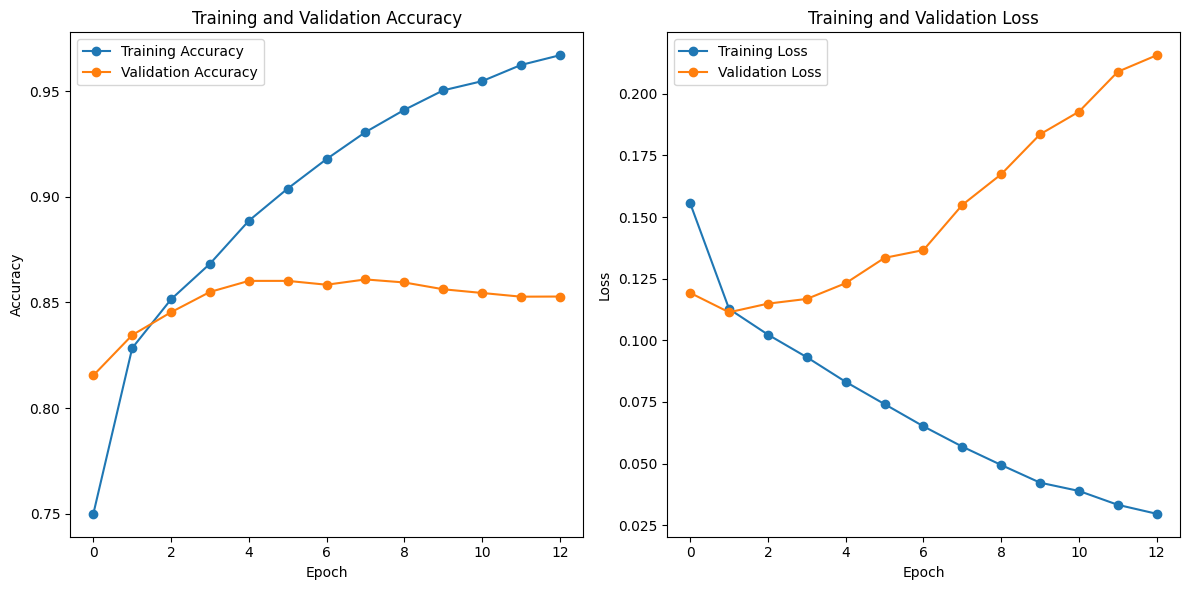

In [8]:
hlp.plot_history(history)

In [7]:
import os
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

def extract_epoch_number(dir):
    files = os.listdir(dir)
    epoch = 0
    for file in files:
        if 'model_epoch' in file:
            epoch = max(epoch, int(file.split('_')[-1]))
    return epoch

N_CLASSES = 5
LEARNING_RATE = 2e-5
MODEL_NAME = r"xlm(roberta)-combined"
path = f'../saved_models/{MODEL_NAME}'
epoch = extract_epoch_number(path)
class_names = ['Disability', 'Gender/Sexual', 'Origin/Nationality', 'Race/Ethnicity', 'Religion']

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = AutoTokenizer.from_pretrained(f'{path}/tokenizer')
model = AutoModelForSequenceClassification.from_pretrained(f'{path}/model_epoch_{epoch}', num_labels=N_CLASSES)
model.to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)

In [8]:
test_data_loader = hlp.create_data_loader(np.array(test_texts), np.array(test_labels), tokenizer, MAX_LEN, BATCH_SIZE)

test_acc, test_loss, test_label_actual, test_label_pred = hlp.eval_model_multi(model, test_data_loader, device)

print(f'Test Accuracy: {test_acc:.2f} Test Loss: {test_loss}')

Test Accuracy: 0.86 Test Loss: 0.154314141883176


Accuracy: 0.86
F1 Score: 0.86
Precision: 0.86
Recall: 0.86

Classification Report:
                    precision    recall  f1-score   support

        Disability       0.48      0.14      0.21       721
     Gender/Sexual       0.84      0.87      0.86     10027
Origin/Nationality       0.47      0.79      0.59       238
    Race/Ethnicity       0.85      0.85      0.85     10354
          Religion       0.92      0.93      0.93      9422

          accuracy                           0.86     30762
         macro avg       0.71      0.71      0.69     30762
      weighted avg       0.86      0.86      0.86     30762



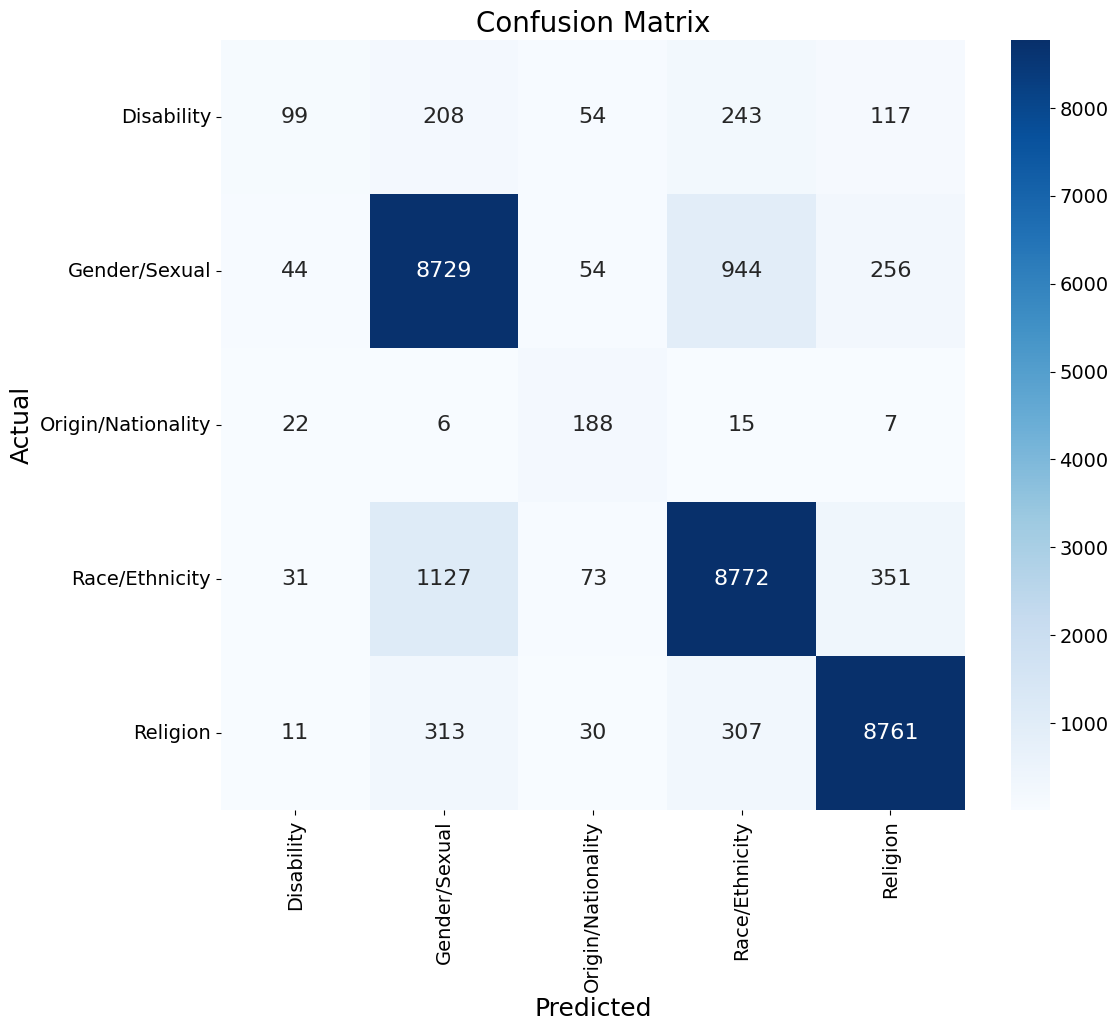

In [9]:
hlp.plot_confusion_matrix(np.argmax(test_label_actual, axis=1), np.argmax(test_label_pred, axis=1), class_names)

In [10]:
test_texts = ["This is the sort of thing that happens in a shithole country. @URL"]
preds, confidence = hlp.predict(test_texts, model, tokenizer, MAX_LEN, device)

index = list(confidence[0]).index(np.array(confidence[0]).max())

print(f"The predicted class is: {class_names[index]} with confidence: {confidence[0][index]:.2f}")

The predicted class is: Origin/Nationality with confidence: 1.00


In [11]:
test_texts = ["Muslims are pathetic they are not humans fuck"]
preds, confidence = hlp.predict(test_texts, model, tokenizer, MAX_LEN, device)

index = list(confidence[0]).index(np.array(confidence[0]).max())

print(f"The predicted class is: {class_names[index]} with confidence: {confidence[0][index]:.2f}")

The predicted class is: Religion with confidence: 1.00


In [25]:
num = 0

for i in range(len(train_texts)):
    if train_labels[i][0] == 0:
        print(train_texts[i])
        num += 1

    if num == 5:
        break

کسی عورت رہنے والا بھی غیر معمولی بات اگر آپ اپنے کاروبار کو صرف یاد رکھیں
ڪاش نگا هجان ها ته ڪڪڙ حامله ٿئي ها، پوءِ ان کي ٻئي سان گڏ وڃي
nupur said true even practically happen islamic countries difference abduct non muslim girl read nikah front fake moulvithis allowed zoobear fact check kar liyo
snowylovessnow مون ان بابت ڪنهن سان ڳالهايو، ساڳيو سوچيو پوءِ هن ڪچي غور ڪندي ڪجهه ماڻهن کي جواب کان نه روڪيندو ته مهرباني ڪري اسٽفو يا بله بله وغيره
سرکاری حکام جو غیر ملکی غیر ملکی غیر سرکاری شہر بنائے ان جرم ذمہ داری ذمہ داری عائد جانی چاہئے
